In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

ID: An id used to identify the participant of the survey
SeparationType: The reason why the person's employment ended
Cease Date: The year or month the person's employment ended
DETE Start Date: The year the person began employment with the DETE
Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

Record ID: An id used to identify the participant of the survey
Reason for ceasing employment: The reason why the person's employment ended
LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)
Let's start by reading the datasets into pandas and exploring them.

In [45]:
# Import the pandas and NumPy libraries.

import pandas as pd
import numpy as np

# Read the dete_survey.csv CSV file into pandas, and assign it to the variable name dete_survey.
# Read the tafe_survey.csv CSV file into pandas, and assign it to the variable name tafe_survey.

dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')

# Use the DataFrame.info() and DataFrame.head() methods to print information about both dataframes, as well as the first few rows. Use other data exploration methods such as the Series.value_counts() and DataFrame.isnull() methods to explore the data and figure out some next steps.

print(dete_survey.info())
print(tafe_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [46]:
print(dete_survey.head())
print(tafe_survey.head())

   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Cent

In [47]:
# Read the dete_survey.csv CSV file into pandas again, but this time read the Not Stated values in as NaN.
# To read Not Stated in as NaN, set the na_values parameter to Not Stated in the pd.read_csv() function.
# Assign the result to the variable name dete_survey.

dete_survey=pd.read_csv('dete_survey.csv',na_values='Not Stated')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [48]:
# Then, let's drop some columns from each dataframe that we won't use in our analysis to make the dataframes easier to work with.
# Use the DataFrame.drop() method to drop the following columns from dete_survey: dete_survey.columns[28:49]. Remember to set the axis parameter equal to 1.
# Assign the result to dete_survey_updated.

dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)

In [49]:
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

In [50]:
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

In [51]:
# Rename the remaining columns in the dete_survey_updated dataframe.
# Use the following criteria to update the column names:
# Make all the capitalization lowercase.
# Remove any trailing whitespace from the end of the strings.
# Replace spaces with underscores ('_').
# As an example, Cease Date should be updated to cease_date.
# Remember you can use the DataFrame.columns attribute to print an array of the existing column names.

dete_survey_updated.columns= dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [52]:
# Use the DataFrame.rename() method to update the columns below in tafe_survey_updated. Don't worry about the rest of the column names right now - we'll handle them later.
# 'Record ID': 'id'
# 'CESSATION YEAR': 'cease_date'
# 'Reason for ceasing employment': 'separationtype'
# 'Gender. What is your Gender?': 'gender'
# 'CurrentAge. Current Age': 'age'
# 'Employment Type. Employment Type': 'employment_status'
# 'Classification. Classification': 'position'
# 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
# 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'

mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated=tafe_survey_updated.rename(mapping, axis = 1)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [53]:
# Use the DataFrame.head() method to look at the current state of the dete_survey_updated and tafe_survey_updated dataframes and make sure your changes look good.

dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [54]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [55]:
# Use the Series.value_counts() method to review the unique values in the separationtype column in both dete_survey_updated and tafe_survey_updated.

dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [56]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [57]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [58]:
# In each of dataframes, select only the data for survey respondents who have a Resignation separation type.
# Remember that the dete_survey_updated dataframe contains three Resignation separation types. We want to select all of them.
# Use the DataFrame.copy() method on the result to avoid the SettingWithCopy Warning.
# Assign the result for dete_survey_updated to dete_resignations.
# Assign the result for tafe_survey_updated to tafe_resignations.

dete_resignations=dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()
tafe_resignations=tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()

In [59]:
# Check the years in each dataframe for logical inconsistencies.
# First, clean the cease_date column in dete_resignations.
# Use the Series.value_counts() method to view the unique values in the cease_date column.
# Use vectorized string methods to extract the year. As a reminder, here is the full list.
# Use the Series.astype() method method to convert the type to a float.

dete_resignations['cease_date']=dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date']=dete_resignations['cease_date'].astype('float')

In [60]:
# Use the Series.value_counts() to check the values in the cease_date and dete_start_date columns in dete_resignations and the cease_date column in tafe_resignations.
# Because Series.value_counts() returns a series, we can use Series.sort_index() method with ascending= True or False to view the highest and lowest values with their counts.
# You can also plot the values of any numeric columns with a boxplot to identify any values that look wrong.

dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [61]:
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [62]:
tafe_resignations['cease_date'].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

In [63]:
# The years in both dataframes don't completely align:

#     The tafe_survey_updated dataframe contains some cease dates in 2009

#     The dete_survey_updated dataframe does not.

#     The tafe_survey_updated dataframe also contains many more cease dates in 2010 than the dete_survey_updated dataframe.

#     Since we aren't concerned with analyzing the results by year, we'll leave them as is.


In [64]:
# Create an institute_service column in dete_resignations
# Create a new column named institute_service in dete_resignations.
# Subtract the dete_start_date from the cease_date. Assign the result to a new column named institute_service.

dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

In [65]:
# Use the Series.value_counts() method to view the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' in the tafe_resignations dataframe.

tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [66]:
# Use the Series.value_counts() method to view the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' in the tafe_resignations dataframe.

tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [67]:
# Update the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' in the tafe_resignations dataframe so that each contains only True, False, or NaN values.
# Write a function named update_vals that makes the following changes:
# If the value is NaN, return np.nan. You can use the following criteria to check that a value is NaN: pd.isnull(val).
# If the value is '-', return False.
# For any other value, return True.

def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

In [68]:
# Use the DataFrame.applymap() method to apply the function above to the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' in the tafe_resignations dataframe.
# Remember that we need to pass the update_vals function into the df.applymap() method without parentheses.

# Use the df.any() method as described above to create a dissatisfied column in BOTH the tafe_resignations and dete_resignations dataframes.

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)

# Use the df.copy() method to create a copy of the results and avoid the SettingWithCopy Warning. Assign the results to dete_resignations_up and tafe_resignations_up.

tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [69]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)

dete_resignations_up = dete_resignations.copy()

dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [70]:
# Below, we'll add an institute column so that we can differentiate the data from each survey after we combine them. Then, we'll combine the dataframes and drop any remaining columns we don't need.

In [71]:
# First, let's add a column to each dataframe that will allow us to easily distinguish between the two.
# Add a column named institute to dete_resignations_up. Each row should contain the value DETE.
# Add a column named institute to tafe_resignations_up. Each row should contain the value TAFE.

dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'

In [72]:
# Combine the dataframes. Assign the result to combined.

combined=pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [73]:
# Recall that we still have some columns left in the dataframe that we don't need to complete our analysis. Use the DataFrame.dropna() method to drop any columns with less than 500 non null values.
# Remember that you can drop columns with less than a certain number of non null values with the thresh parameter.
# Assign the result to combined_updated.

combined_updated=combined.dropna(thresh=500, axis=1).copy()

In [74]:
# Next, we'll clean the institute_service column and categorize employees according to the following definitions:

#     New: Less than 3 years in the workplace
#     Experienced: 3-6 years in the workplace
#     Established: 7-10 years in the workplace
#     Veteran: 11 or more years in the workplace

# Our analysis is based on this article, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

In [75]:
# First, we'll extract the years of service from each value in the institute_service column.
# Use the Series.astype() method to change the type to 'str'.
# Use vectorized string methods to extract the years of service from each pattern. You can find the full list of vectorized string methods here.
# Double check that you didn't miss extracting any digits.
# Use the Series.astype() method to change the type to 'float'.

combined_updated['institute_service'].value_counts(dropna=False)
combined_updated['institute_service_up']=combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [76]:
# Next, we'll map each value to one of the career stage definitions above.
# Create a function that maps each year value to one of the career stages above.
# Remember that you'll have to handle missing values separately. You can use the following code to check if a value is NaN where val is the name of the value: pd.isnull(val).

def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"

In [77]:
# Use the Series.apply() method to apply the function to the institute_service column. Assign the result to a new column named service_cat.

combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [78]:
# Finally, we'll replace the missing values in the dissatisfied column with the most frequent value, False. Then, we'll calculate the percentage of employees who resigned due to dissatisfaction in each service_cat group and plot the results.

# Note that since we still have additional missing values left to deal with, this is meant to be an initial introduction to the analysis, not the final analysis.

In [79]:
# Use the Series.value_counts() method to confirm if the number of True and False in the dissatisfied column. Set the dropna parameter to False to also confirm the number of missing values.

combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [80]:
# Use the DataFrame.fillna() method to replace the missing values in the dissatisfied column with the value that occurs most frequently in this column, either True or False.

combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [81]:
# Use the DataFrame.pivot_table() method to calculate the percentage of dissatisfied employees in each service_cat group.
# Since a True value is considered to be 1, calculating the mean will also calculate the percentage of dissatisfied employees. The default aggregation function is the mean, so you can exclude the aggfunc argument.

dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

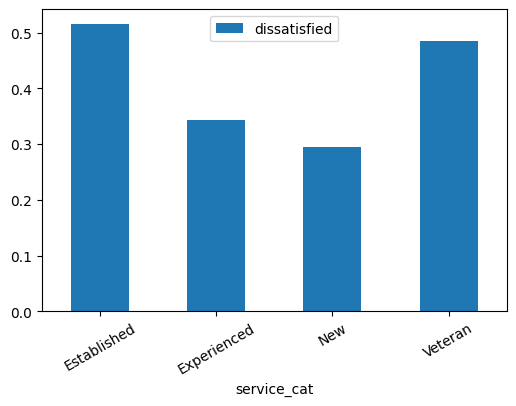

In [83]:
# Use the DataFrame.plot() method to plot the results. Set the kind parameter equal to bar to create a bar chart.
%matplotlib inline

dis_pct.plot(kind='bar', rot=30)

In [84]:
dissatisfied_pivot = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
dissatisfied_pivot = dissatisfied_pivot.sort_values('dissatisfied')
dissatisfied_pivot

,dissatisfied
service_cat,
New,0.295337
Experienced,0.343023
Veteran,0.485294
Established,0.516129


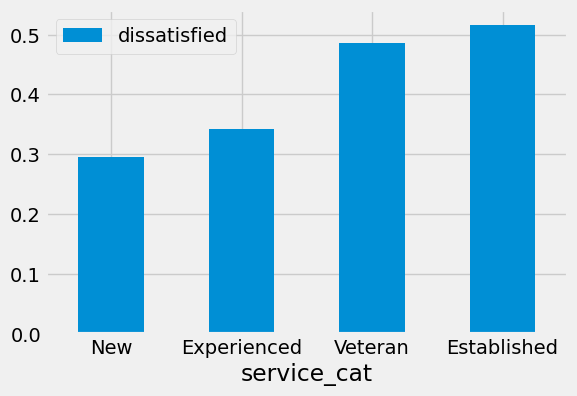

In [85]:
import matplotlib.style as style
style.use('fivethirtyeight')
dissatisfied_pivot.plot(kind='bar', rot =0)

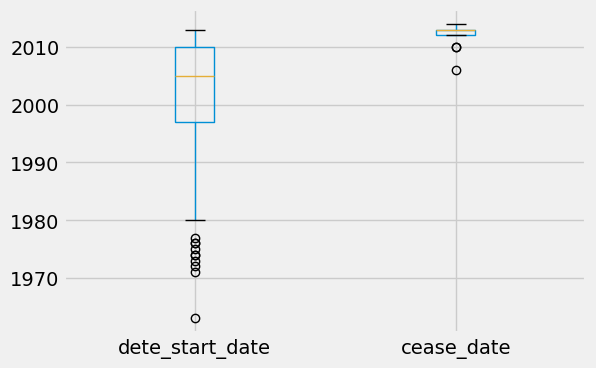

In [86]:
dete_resignations[['dete_start_date', 'cease_date']].boxplot()

In [87]:
# Findings

# From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.

## Employee Dissatisfaction by Age

We'll go about attempting to answer the question of whether younger or older employees are more likely to cite dissatisfaction as a reason for leaving.

First, the Age column will have to be cleaned.


In [88]:
combined_updated['age'].value_counts(dropna = False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
36  40           32
26  30           32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

## Define a function to map a person's age into a group

In a similar vein as the categorizing of career stage that was done before, we'll define a function that maps out a person's age into age groups:

    21 or less
    21-25
    26-30
    31-35
    36-40
    41-50
    51-60
    Above 60

Since the missing values here can't be filled to a specific value (since they would skew that age category a lot), they will simply be ignored.

A significant amount of data is not being lost as the missing age values only make up about 10% of the total amount of values.


## Employee Dissatisfaction by Institute

It's worth attempting to figure out whether the difference in dissatisfaction rates between the two initial datasets, tafe_survey and dete_survey is significant.

Since we already have an institute column, this will be very straightforward to figure out.

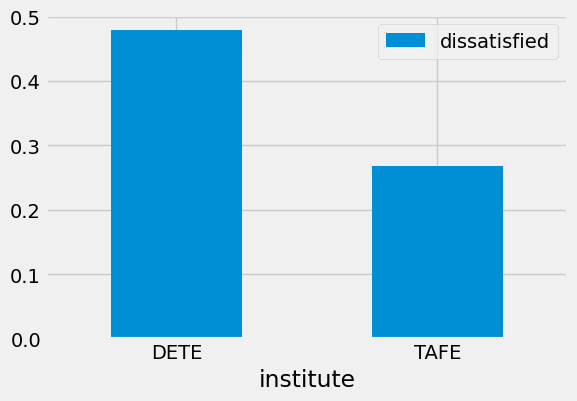

In [94]:
dissatisfied_institute = (combined_updated.
                          pivot_table(index='institute',
                                      values = 'dissatisfied'))

dissatisfied_institute.plot(kind='bar', rot = 0)

## Findings

We notice that, at first glance, there appears to be a remarkable difference in the reported dissatisfaction rates of employees from the DETE and the TAFE firms.

However, there is a very easy explanation for this discrepancy.

Recall that there were several more columns from the dete survey forms that corresponded to employee dissatisfaction. The columns we used to measure dissatisfaction from each dataset were the following:

tafe_resignations:

    Contributing Factors. Dissatisfaction
    Contributing Factors. Job Dissatisfaction

dete_resignations:

    job_dissatisfaction
    dissatisfaction_with_the_department
    physical_work_environment
    lack_of_recognition
    lack_of_job_security
    work_location
    employment_conditions
    work_life_balance
    workload

The observed increased dissatisfaction results in the DETE survey results could be explained by the fact that there were more options to choose from.
